In [9]:
import sklearn as sk
import sklearn.preprocessing
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt

In [54]:
labels = ['Sex', 'Length', 'Diameter','Height', 'Whole Weight', 
          'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
data = pd.read_csv(target_url, names = labels)

In [55]:
enc = sk.preprocessing.LabelEncoder()
enc.fit(data['Sex'])
summary = data.describe()
for i in range(8):
    mean = summary.iloc[1,i]
    std = summary.iloc[2,i]
    data.iloc[:,i+1] = (data.iloc[:,i+1] - mean)/std

                  Length  Diameter    Height  Whole Weight  Shucked Weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole Weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked Weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera Weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell Weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera Weight  Shell Weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole Weight          0.966375      0.955355  0.540390  
Shucked Weig

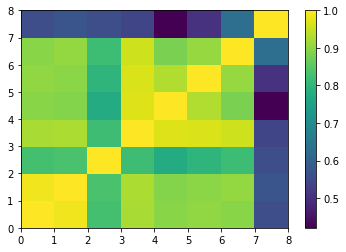

In [57]:
cor_mat = data.corr()
print(cor_mat)
plt.pcolor(cor_mat)
plt.colorbar()
plt.show()

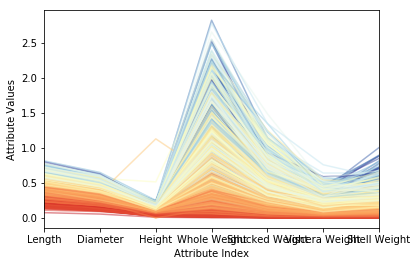

In [58]:
labels = ['Sex', 'Length', 'Diameter','Height', 'Whole Weight', 
          'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(target_url, names = labels)
meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]
nrows = len(abalone.index)
for i in range(nrows):
#plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    normTarget = (abalone.iloc[i,8] - meanRings)/sdRings
    labelColor = 1.0/(1.0 + np.exp(-normTarget))
    dataRow.plot(color=plt.cm.RdYlBu(labelColor), alpha=0.5)
plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()

In [93]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
wine = pd.read_csv(target_url, sep=';')
summary = wine.describe()

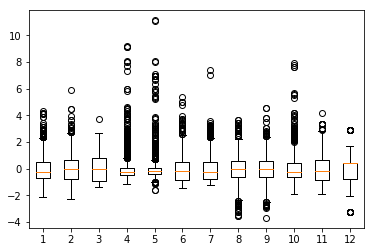

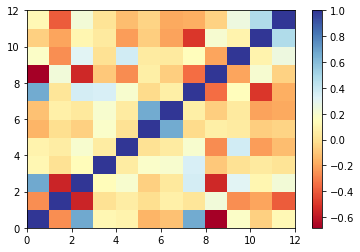

In [94]:
wine_norm = wine
n_features = len(wine.columns)
for i in range(n_features):
    mean = summary.iloc[1,i]
    std = summary.iloc[2,i]
    wine_norm.iloc[:,i] = (wine_norm.iloc[:,i] - mean)/std
plt.boxplot(wine_norm.values)
plt.show()
plt.pcolor(wine_norm.corr(), cmap= 'RdYlBu')
plt.colorbar()
plt.show()

In [121]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
glass = pd.read_csv(target_url,header=None, prefix="V")
glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type']
glass_label = glass['Type']
glass.drop(['Id','Type'], axis=1, inplace=True)

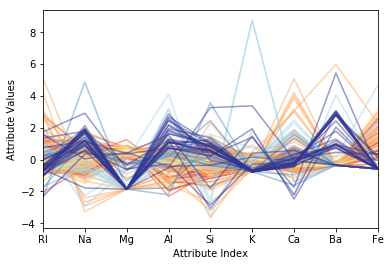

In [124]:
n_data, n_features = glass.shape
summary = glass.describe()
glass_norm = glass
for i in range(n_features):
    mean = summary.iloc[1,i]
    std = summary.iloc[2,i]
    glass_norm.iloc[:,i] = (glass_norm.iloc[:,i]-mean)/std
for i in range(n_data):
    glass_df = glass_norm.iloc[i,:]
    label_color = glass_label[i]/7.0
    glass_df.plot(color=plt.cm.RdYlBu(label_color), alpha=0.5)
plt.xlabel("Attribute Index")
plt.ylabel("Attribute Values")
plt.show()

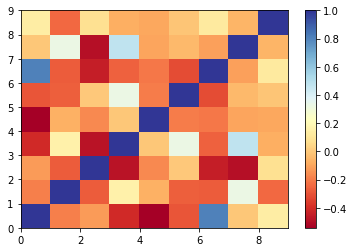

In [128]:
plt.pcolor(glass.corr(), cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.show()